### 猫狗分类

#### 解压猫狗数据集

In [1]:
import os
import zipfile

local_zip = "E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/cats_and_dogs_filtered.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog')
zip_ref.close()

#### 数据集划分为训练集和验证集

In [2]:
base_dir = 'E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir , 'train')
val_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

#### 查看部分数据

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


#### 打印训练集和验证集的数量

In [4]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( val_cats_dir ) ))
print('total validation dog images :', len(os.listdir( val_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


#### 显示部分数据集

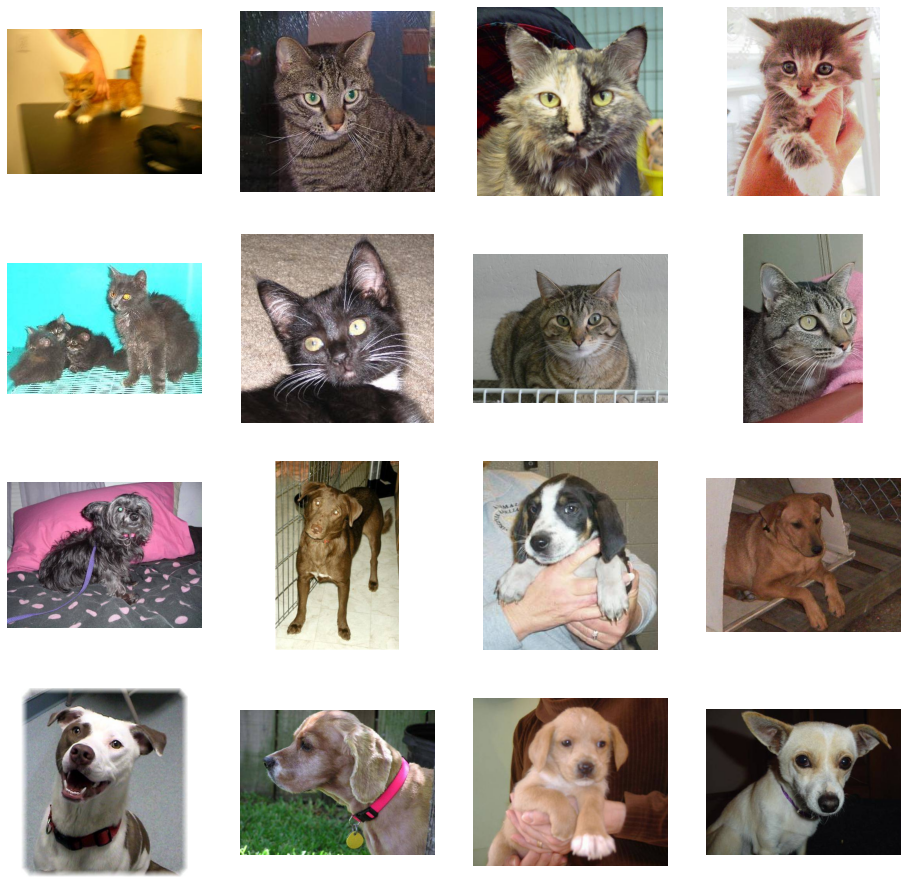

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]
                ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#### 构建神经网络

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### 打印网络结构层

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

#### 设置损失函数和优化算法

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

#### 归一化数据和生成训练集、验证集

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( 
                rescale = 1.0/255.
                # ,rotation_range=40,     # 0~40°之间随机旋转 
                # width_shift_range=0.2,  # 随机移动
                # height_shift_range=0.2, # 随机移动
                # shear_range=0.2,        # 裁剪图片
                # zoom_range=0.2,         # 放大图片
                # horizontal_flip=True,   # 镜像
                # fill_mode='nearest'
                )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
                                                    
val_generator =  test_datagen.flow_from_directory(val_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 训练

In [12]:
history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 4s - loss: 0.0653 - acc: 0.9910 - val_loss: 2.1965 - val_acc: 0.7170
Epoch 2/15
100/100 - 4s - loss: 0.0432 - acc: 0.9920 - val_loss: 3.7305 - val_acc: 0.6620
Epoch 3/15
100/100 - 4s - loss: 0.0261 - acc: 0.9930 - val_loss: 2.1611 - val_acc: 0.7110
Epoch 4/15
100/100 - 4s - loss: 0.0250 - acc: 0.9940 - val_loss: 2.3281 - val_acc: 0.7170
Epoch 5/15
100/100 - 4s - loss: 0.0122 - acc: 0.9950 - val_loss: 2.5666 - val_acc: 0.7230
Epoch 6/15
100/100 - 4s - loss: 0.1285 - acc: 0.9910 - val_loss: 2.2659 - val_acc: 0.6990
Epoch 7/15
100/100 - 4s - loss: 0.0249 - acc: 0.9945 - val_loss: 2.6278 - val_acc: 0.7180
Epoch 8/15
100/100 - 4s - loss: 0.0106 - acc: 0.9965 - val_loss: 2.7535 - val_acc: 0.7080
Epoch 9/15
100/100 - 4s - loss: 0.0660 - acc: 0.9900 - val_loss: 2.6081 - val_acc: 0.7050
Epoch 10/15
100/100 - 4s - loss: 0.0303 - acc: 0.9950 - val_loss: 2.8104 - val_acc: 0.7130
Epoch 11/15
100/100 - 4s - loss: 0.0246 - acc: 0.9970 - val_loss: 2.4829 - val_acc: 0.7000
Epoch 12

#### 预测

In [13]:
import numpy as np 
import cv2
from keras.preprocessing import image

image_dir = 'E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs'

image_names = os.listdir(image_dir)
sorted_image_names = sorted(image_names)
for name in sorted_image_names:
    image_name = os.path.join(image_dir, name)
    image = cv2.imread(image_name)

    x = cv2.resize(image, (150, 150))
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=20)

    print(classes[0])
    if classes[0]>0.5:
        print(image_name + " is a dog")
    else:
        print(image_name + " is a cat")

[1.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (1).jpg is a dog
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (10).jpg is a cat
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (11).jpg is a cat
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (2).jpg is a cat
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (3).jpg is a cat
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (4).jpg is a cat
[1.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (5).jpg is a dog
[1.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (6).jpg is a dog
[1.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (7).jpg is a dog
[0.]
E:/02Studying/03DeepLearning/dataset/jupyter/05CatDog/test_cats_dogs\cats (8).jpg is a cat
[1.]
E:/02Studying/03DeepLearning/data

#### 可视化显示网络特征提取

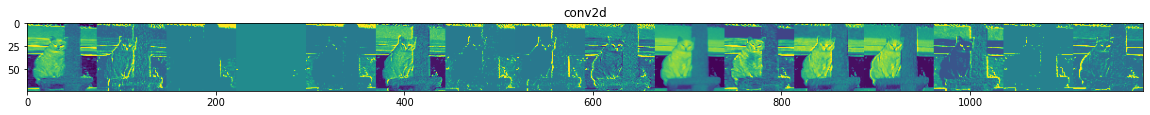

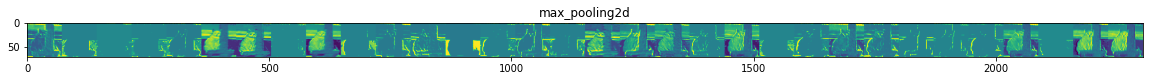

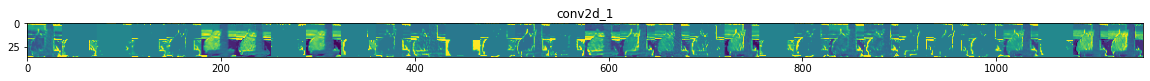

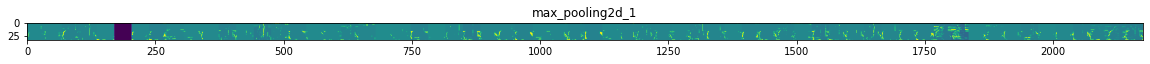

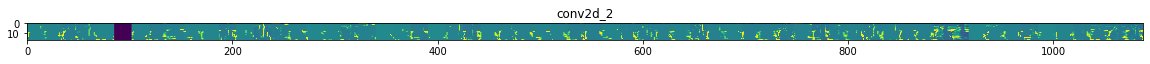

In [14]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

#### 显示训练集和验证集损失函数曲线和准确率曲线

Text(0.5, 1.0, 'Training and validation loss')

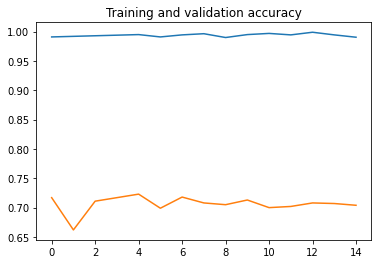

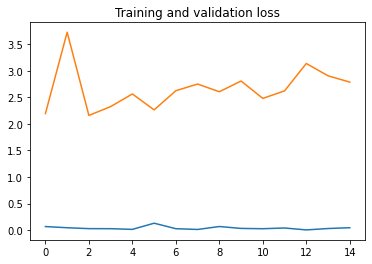

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

#### 清理内存，释放资源

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGTERM
       )